#### Kidney Exchange Program:

To do:

- Add data set creation into a class and out of the notebook.
- Add specific matching based on criteria for compatibility matching into it's own class and out of the notebook.
- Add objective/fitness function into a class and out of the notebook.
- Clean up

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
import math

In [2]:
#Estimated Glomerular Filtration Rate
#kidney.org/sites/default/files/docs/11-10-1813_abe_patbro_gfr_b.pdf

eGFRm18 = np.random.normal(100,13,1000) #Male 18 to 24
eGFRm25 = np.random.normal(93,13,1000)  #Male 25 to 29
eGFRm30 = np.random.normal(86,13,1000)  #Male 30 to 34
eGFRm35 = np.random.normal(85,14,1000)  #Male 35 to 39
eGFRm40 = np.random.normal(84,13,1000)  #Male 40 to 44
eGFRm45 = np.random.normal(83,13,1000)  #Male 45 to 49
eGFRm50 = np.random.normal(79,12,1000)  #Male 50 to 54
eGFRm55 = np.random.normal(76,13,1000)  #Male 55 to 59
eGFRm60 = np.random.normal(75,15,1000)  #Male 60 to 64

eGFRf18 = np.random.normal(91,15,1000)  #Female 18 to 24
eGFRf25 = np.random.normal(85,13,1000)  #Female 25 to 29
eGFRf30 = np.random.normal(85,15,1000)  #Female 30 to 34
eGFRf35 = np.random.normal(79,13,1000)  #Female 35 to 39
eGFRf40 = np.random.normal(77,12,1000)  #Female 40 to 44
eGFRf45 = np.random.normal(74,10,1000)  #Female 45 to 49
eGFRf50 = np.random.normal(73,13,1000)  #Female 50 to 54
eGFRf55 = np.random.normal(70,12,1000)  #Female 55 to 59
eGFRf60 = np.random.normal(68,12,1000)  #Female 60 to 64

In [3]:
def rand_pop(size):
#--------------------------------------------------------------------------------------------------------------------------
    #Function that creates a random pool of Icelandic people
    
    #Input Variables:
        #size:       Number of persons, int
    
    #Output:
        #pop:        Pool of Icelandic people with and critera used for evaluating kidney compatibility, array
#--------------------------------------------------------------------------------------------------------------------------
    
    bt_pop = np.random.choice(['O', 'A', 'B', 'AB'], size, p=[0.55, 0.32, 0.10, 0.03])   #Blood type
    aa_pop = np.random.choice([0, 1], size, p=[0.995, 0.005])                            #Born in Africa
    age_pop = np.random.randint(18, 60 ,size)                                            #Age
    gen_pop = np.random.choice([0, 1], size, p=[0.5, 0.5])                               #Sex
    
    #Initialize
    #Estimated Glomerular Filtration Rate:
    eGFR_pop = np.zeros(size)            #kidney.org/sites/default/files/docs/11-10-1813_abe_patbro_gfr_b.pdf
    
    #Body Mass Index:
    BMI_pop = np.zeros(size)             #landlaeknir.is/servlet/file/store93/item35880/4950_zbmifl_BMI_UTFEGID.pdf
    
    #Systolic Blood Pressure:
    SBP_pop = np.zeros(size)             #hjarta.is/wp-content/uploads/2019/03/Handbok-Hjartaverndar.pdf
    
    #History of Cigarette Use:
    cig_pop = np.zeros(size)             #https://www.landlaeknir.is/tolfraedi-og-rannsoknir/tolfraedi/heilsa-og-lidan/tobaksnotkun/
    
    #Place holders:
    hla_b_pop = np.zeros(size)           #Does not belong in this function, only here as a placeholder.
    hla_dr_pop = np.zeros(size)          #Does not belong in this function, only here as a placeholder.
    rel_pop = np.zeros(size)             #Could the probably be calculated. What is the likelihood of an Icelander running
                                         #someone as related as first from a randomly choice group of Icelanders.
                                         #Does not belong in this function, only here as a placeholder.
    
    for i in range(size):
        
        if age_pop[i] >= 18 and age_pop[i] <= 29:
            
            if gen_pop[i] == 0:
                
                if age_pop[i] <= 24:
                    eGFR_pop[i] = np.random.choice(eGFRm18)
                else:
                    eGFR_pop[i] = np.random.choice(eGFRm25)
                    
                cig_pop[i] = np.random.choice([0, 1], 1, p=[0.6925, 0.3075])
                
            elif gen_pop[i] == 1:

                if age_pop[i] <= 24:
                    eGFR_pop[i] = np.random.choice(eGFRf18)
                else:
                    eGFR_pop[i] = np.random.choice(eGFRf25)
                    
                cig_pop[i] = np.random.choice([0, 1], 1, p=[0.7440, 0.256])
                
        elif age_pop[i] >= 30 and age_pop[i] <= 39:
            
            if gen_pop[i] == 0:

                if age_pop[i] <= 34:
                    eGFR_pop[i] = np.random.choice(eGFRm30)
                else:
                    eGFR_pop[i] = np.random.choice(eGFRm35)
                    
                cig_pop[i] = np.random.choice([0, 1], 1, p=[0.5837, 0.4163])
                
            elif gen_pop[i] == 1:
                
                if age_pop[i] <= 34:
                    eGFR_pop[i] = np.random.choice(eGFRf30)
                else:
                    eGFR_pop[i] = np.random.choice(eGFRf35)                
                
                cig_pop[i] = np.random.choice([0, 1], 1, p=[0.6085, 0.3915])
                
        elif age_pop[i] >= 40 and age_pop[i] <= 49:
            
            if gen_pop[i] == 0:
                
                if age_pop[i] <= 44:
                    eGFR_pop[i] = np.random.choice(eGFRm40)
                else:
                    eGFR_pop[i] = np.random.choice(eGFRm45)
                    
                cig_pop[i] = np.random.choice([0, 1], 1, p=[0.5457, 0.4543])
                
            elif gen_pop[i] == 1:
                
                if gen_pop[i] == 0:
                
                    if age_pop[i] <= 44:
                        eGFR_pop[i] = np.random.choice(eGFRf40)
                    else:
                        eGFR_pop[i] = np.random.choice(eGFRf45)
                
                    cig_pop[i] = np.random.choice([0, 1], 1, p=[0.5702, 0.4298])
                
        elif age_pop[i] >= 50 and age_pop[i] <= 59:
            
            if gen_pop[i] == 0:
                
                if age_pop[i] <= 54:
                    
                    eGFR_pop[i] = np.random.choice(eGFRm50)
                else:
                    eGFR_pop[i] = np.random.choice(eGFRm55)
                    
                cig_pop[i] = np.random.choice([0, 1], 1, p=[0.384, 0.616])
                
            elif gen_pop[i] == 1:
                
                if age_pop[i] <= 54:
                    
                    eGFR_pop[i] = np.random.choice(eGFRf50)
                else:
                    eGFR_pop[i] = np.random.choice(eGFRf55)
                
                cig_pop[i] = np.random.choice([0, 1], 1, p=[0.4553, 0.5447])
            
        elif age_pop[i] >= 60 and age_pop[i] <= 69:
            
            if gen_pop[i] == 0:
                
                if age_pop[i] <= 64:
                    
                    eGFR_pop[i] = np.random.choice(eGFRm60)

                cig_pop[i] = np.random.choice([0, 1], 1, p=[0.3371, 0.6629])
                
            elif gen_pop[i] == 1:
                
                if age_pop[i] <= 64:
                    
                    eGFR_pop[i] = np.random.choice(eGFRf60)
                
                cig_pop[i] = np.random.choice([0, 1], 1, p=[0.3682, 0.6318])
                
        elif age_pop[i] >= 70 and age_pop[i] <= 79:
            eGFR_pop[i] = 75
            
        if gen_pop[i] == 0:
            
            if age_pop[i] >=18 and age_pop[i] <= 44:
                
                temp = np.random.choice([0, 1, 2, 3], 1, p=[0.009, 0.376, 0.386, 0.229])
                
                SBP_pop[i] = 122
                
                if temp == 0:
                    BMI_pop[i] = np.random.randint(14, 18.49 ,1)
                elif temp == 1:
                    BMI_pop[i] = np.random.randint(18.5, 25 ,1)
                elif temp == 2:
                    BMI_pop[i] = np.random.randint(25.01, 30 ,1)
                elif temp == 3:
                    BMI_pop[i] = np.random.randint(30.01, 47 ,1)
                    
            elif age_pop[i] >=45 and age_pop[i] <= 66:
                
                temp = np.random.choice([0, 1, 2, 3], 1, p=[0.001, 0.191, 0.522, 0.286])
                
                SBP_pop[i] = 126
                
                if temp == 0:
                    BMI_pop[i] = np.random.randint(14, 18.49 ,1)
                elif temp == 1:
                    BMI_pop[i] = np.random.randint(18.5, 25 ,1)
                elif temp == 2:
                    BMI_pop[i] = np.random.randint(25.01, 30 ,1)
                elif temp == 3:
                    BMI_pop[i] = np.random.randint(30.01, 47 ,1)                
                
            elif age_pop[i] >= 67:

                temp = np.random.choice([0, 1, 2, 3], 1, p=[0.003, 0.27, 0.473, 0.255])
                
                SBP_pop[i] = 140
                
                if temp == 0:
                    BMI_pop[i] = np.random.randint(14, 18.49 ,1)
                elif temp == 1:
                    BMI_pop[i] = np.random.randint(18.5, 25 ,1)
                elif temp == 2:
                    BMI_pop[i] = np.random.randint(25.01, 30 ,1)
                elif temp == 3:
                    BMI_pop[i] = np.random.randint(30.01, 47 ,1)                 
        
        elif gen_pop[i] == 1:
                
            if age_pop[i] >= 18 and age_pop[i] <= 44:
                
                temp = np.random.choice([0, 1, 2, 3], 1, p=[0.011, 0.452, 0.269, 0.268])
                
                SBP_pop[i] = 108
                
                if temp == 0:
                    BMI_pop[i] = np.random.randint(14, 18.49 ,1)
                elif temp == 1:
                    BMI_pop[i] = np.random.randint(18.5, 25 ,1)
                elif temp == 2:
                    BMI_pop[i] = np.random.randint(25.01, 30 ,1)
                elif temp == 3:
                    BMI_pop[i] = np.random.randint(30.01, 47 ,1)
                    
            elif age_pop[i] >= 45 and age_pop[i] <= 66:
                
                temp = np.random.choice([0, 1, 2, 3], 1, p=[0.002, 0.343, 0.350, 0.305])
                
                SBP_pop[i] = 120
                
                if temp == 0:
                    BMI_pop[i] = np.random.randint(14, 18.49 ,1)
                elif temp == 1:
                    BMI_pop[i] = np.random.randint(18.5, 25 ,1)
                elif temp == 2:
                    BMI_pop[i] = np.random.randint(25.01, 30 ,1)
                elif temp == 3:
                    BMI_pop[i] = np.random.randint(30.01, 47 ,1)                
                
            elif age_pop[i] >= 67:

                temp = np.random.choice([0, 1, 2, 3], 1, p=[0.015, 0.318, 0.413, 0.253])
                
                SBP_pop[i] = 140
                
                if temp == 0:
                    BMI_pop[i] = np.random.randint(14, 18.49 ,1)
                elif temp == 1:
                    BMI_pop[i] = np.random.randint(18.5, 25 ,1)
                elif temp == 2:
                    BMI_pop[i] = np.random.randint(25.01, 30 ,1)
                elif temp == 3:
                    BMI_pop[i] = np.random.randint(30.01, 47 ,1)
    
    pop = [bt_pop, cig_pop, age_pop, eGFR_pop, BMI_pop, aa_pop, SBP_pop, rel_pop, hla_b_pop, hla_dr_pop, gen_pop]
    pop = np.array(pop,dtype=object)
                
    return pop

In [4]:
def LKDPI_fun(rec_pop, don_pop):
#--------------------------------------------------------------------------------------------------------------------------
    #Function that evaluates kidney receiver and donor compatibility
    
    #Input Variables:
        #rec_pop:       Pool of kidney receivers, array
        #don_pop:       Pool of kidney donors, array
    
    #Output:
        #LKDPI:         Compatibility of each kidney receiver and donor, array
        
    #A Risk Index for Living Donor Kidney Transplantation
    #Living Kidney Donor Profile Index
    #https://onlinelibrary.wiley.com/doi/pdf/10.1111/ajt.13709
#--------------------------------------------------------------------------------------------------------------------------
    
    #Input:
    age = don_pop[2,:]                 #Age of donor
    cig = don_pop[1,:]                 #Smoker, 1 for True, 0 for False
    eGFR = don_pop[3,:]                #Estimated Glomerular Filtration Rate
    BMI = don_pop[4,:]                 #Body Mass Index
    aa = don_pop[5,:]                  #African-American, 1 for True, 0 for False
    SBP = don_pop[6,:]                 #Systolic Blood Pressure
    rel = don_pop[7,:]                 #Donor and Recipient Related, 1 for True, 0 for False
    hla_b = don_pop[8,:]               #HLA-B mismatches, 0 to 2
    hla_dr = don_pop[9,:]              #HLA-DR mismatches, 0 to 2
    
    res_g = rec_pop[10,:]              #Recipient Gender, 1 for male, 0 for female
    don_g = don_pop[10,:]              #Donor Gender, 1 for male, 0 for female
    res_w = 80                         #Recipient Weight
    don_w = 80                         #Donor Weight
    res_bt = rec_pop[0,:]              #Recipient Blood type, O, A, B or AB
    don_bt = don_pop[0,:]              #Donor Blood type, O, A, B or AB
    
    hla_b_pop = np.zeros(don_pop.shape[1])
    hla_dr_pop = np.zeros(don_pop.shape[1])

    #Initialize:
    age_f = 0                          #Age Factor
    aa_f = 0                           #African-American Factor
    cig_f = 0                          #Cigarette Use Factor
    mm_f = 0                           #Male Recipient, Male Donor Factor
    bt_f = 0                           #Blood Type Factor
    rel_f = 0                          #Related Factor
    WR = 0                             #Weight Ratio
    LKDPI = np.zeros(shape=(rec_pop.shape[1],don_pop.shape[1])) #Output
    
    #temp
    temp_hla_b = np.zeros(shape=(rec_pop.shape[1],don_pop.shape[1]))
    temp_hla_dr = np.zeros(shape=(rec_pop.shape[1],don_pop.shape[1]))
    temp_hla_rel = np.zeros(shape=(rec_pop.shape[1],don_pop.shape[1]))
    
    #Calculate compatibility:
    for j in range(rec_pop.shape[1]):
        
        for i in range(don_pop.shape[1]):

            if age[i] > 50:
                age_f = age[i] - 50
            else:
                age_f = 0
    
            if cig[i] == 1:
                cig_f = 14.33
            else:
                cig_f = 0
    
            if aa[i] == 1:
                aa_f = 22.34
            else:
                aa_f = 0
    
            if res_g[j] == 1 and don_g[i] == 1:
                mm_f = -21.68
            else:
                mm_f = 0

            if res_bt[j] == "A" and (don_bt[i] == "O" or don_bt[i] == "A"):
                bt_f = 0
            elif res_bt[j] == "B" and (don_bt[i] == "O" or don_bt[i] == "B"):
                bt_f = 0
            elif res_bt[j] == "AB" and (don_bt[i] == "O" or don_bt[i] == "A" or don_bt[i] == "B" or don_bt[i] == "AB"):
                bt_f = 0
            elif res_bt[j] == "O" and don_bt[i] == "O":
                bt_f = 0
            else:
                bt_f = 27.3
            
            rel_temp = np.random.choice([0, 1], 1, p=[0.10, 0.90])
            if rel[i] == 0:
                rel_f = -10.16
            else:
                rel_f = 0

            if don_w/res_w < 0.9:
                WR = don_w/res_w
            else:
                WR = 0.9
            
            hla_b_pop[i] = np.random.choice([0, 1, 2], 1, p=[0.05, 0.30, 0.65])
            hla_dr_pop[i] = np.random.choice([0, 1, 2], 1, p=[0.05, 0.30, 0.65])
            
            LKDPI[j,i] = -11.3+(1.85*age_f)-(0.381*eGFR[i])+(1.17*(BMI[i]+cig_f+aa_f))+(0.44*(SBP[i]+mm_f+bt_f+rel_temp))+(8.57*hla_b_pop[i])+(8.26*hla_dr_pop[i])-(50.87*WR)
          
            temp_hla_b[j,i] = hla_b_pop[i]
            temp_hla_dr[j,i] = hla_dr_pop[i]
            temp_hla_rel[j,i] = rel_temp
        
    return LKDPI, temp_hla_b, temp_hla_dr, temp_hla_rel

In [5]:
def kidneyMatch(rec_pop, don_pop, don_link, LKDPI, temp_hla_b, temp_hla_dr, temp_hla_rel):
#--------------------------------------------------------------------------------------------------------------------------
    #Function that finds kidney receivers that provide kidney donors that are matches to other kidney receiver
    
    #Input Variables:
        #rec_pop:    Pool of kidney recievers, array
        #don_pop:    Pool of kidney donors, array
        #don_link:   List of what donors are associated with what receiver, array
        #LKDPI:      Compatability of all donors vs. receivers, array
    
    #Output:
        #rec_pop:    Pool of kidney recievers, 2d array
        #don_pop:    Pool of kidney donors, 2d array
        #don_link:   List of what donors are associated with what receiver, array
        #LKDPI:      Compatability of all donors vs. receivers, 2d array
        #mMat:       Compatability of all receivers vs. receivers, 2d array
        #mArr_idx:   Receivers left, original sequence numbering, array
#--------------------------------------------------------------------------------------------------------------------------

    #Initialize:
    nRec = rec_pop.shape[1]               #Number of Kidney receivers
    nDon = don_pop.shape[1]               #Number of Kidney donors
    mMat = np.zeros(shape=(nRec,nRec))
    dMat = np.zeros(shape=(nRec,nRec))
    fitMat = np.zeros(shape=(nRec,nRec))
    noMatch = np.zeros(nRec)
    n = 0
    j = 0
    i = 0
    k = 0
    l = 0
    
    #Find all matches:
    for j in range(nRec):
        
        for i in range(nDon):
            
            if LKDPI[j,i] <= 10:
                
                mMat[don_link[i]-1,j] = 1

                if dMat[don_link[i]-1,j] == 0:
               
                    dMat[don_link[i]-1,j] = i+1
                
                    fitMat[[don_link[i]-1,j]] = LKDPI[j,i]
                
                elif dMat[don_link[i]-1,j] != 0 and fitMat[don_link[i]-1,j] > LKDPI[j,i]:
                    
                    dMat[don_link[i]-1,j] = i+1
                    
                    fitMat[[don_link[i]-1,j]] = LKDPI[j,i]       
        
        #No one can receive kidney from their own donors:           
        mMat[j,j] = 0 
        dMat[j,j] = 0
        fitMat[j,j] = 0
        
    mArr_idx = np.arange(1,nRec+1)

    mMat_row_idx = (np.sum(mMat,axis=1)==0)
    mMat_col_idx = (np.sum(mMat,axis=0)==0)

    #While their exists a kidney receiver in the pool that does not contribute with a donor or a kidney receiver that
    #is not a match to any donors:
    while (0 in mMat_row_idx) or (0 in mMat_col_idx):
    
        #Remove all receivers that don't contribute a donor
        for k in range(nRec-1,-1,-1):
        
            if mMat_row_idx[k] or mMat_col_idx[k]:
            
                print(f"Round {n}:",f"Kidney receiver #: {k+1} has no donors that are matches to other kidney receivers")
        
                LKDPI = np.delete(LKDPI,k,axis=0)
                rec_pop = np.delete(rec_pop,k,axis=1)
                mMat = np.delete(mMat,k,axis=0)
                mMat = np.delete(mMat,k,axis=1)
                dMat = np.delete(dMat,k,axis=0)
                dMat = np.delete(dMat,k,axis=1)
                fitMat = np.delete(fitMat,k,axis=0)
                fitMat = np.delete(fitMat,k,axis=1)
                mArr_idx = np.delete(mArr_idx,k)
                temp_hla_b = np.delete(temp_hla_b,k,axis=0)
                temp_hla_dr = np.delete(temp_hla_dr,k,axis=0)
                temp_hla_rel = np.delete(temp_hla_rel,k,axis=0)
    
        #Remove all donors that are associated with receivers that don't contribute a donor
        for l in range(don_link.shape[0]-1,-1,-1):
            
            if not don_link[l] in mArr_idx:
                
                don_link = np.delete(don_link,l,axis=0)
                #don_pop = np.delete(don_pop,l,axis=1)
                LKDPI = np.delete(LKDPI,l,axis=1)
                
        mMat_row_idx = np.sum(mMat,axis=1)
        mMat_col_idx = np.sum(mMat,axis=0)
        nRec = rec_pop.shape[1]               #Number of Kidney receivers still qualified
        n = n + 1

    return rec_pop, don_pop, don_link, LKDPI, mMat, mArr_idx, dMat, fitMat, temp_hla_b, temp_hla_dr, temp_hla_rel

In [6]:
def int_starting_population(nGene, nPop, nVar):
#---------------------------------------------------------------------------------------------------------------------
    #Function for generation of initial population
    
    #Input Variables:
        #nPop:       Number of chromosomes in population, int
        #nGene:      Number of genes in a chromosome, int
        #nVar:       Number of Variables in a Gene, int
    
    #Output:
        #Population, array
#---------------------------------------------------------------------------------------------------------------------
        
    #Initialize:
    iPop = np.zeros((nPop, nGene))
    chromos = range(nVar)

    for i in range(nPop):
        iPop[i,:] = random.sample(chromos,nGene)
        
    return iPop

In [7]:
def reproduction(sPop, P_i, rPr):
#--------------------------------------------------------------------------------------------------------------------------        
    #Function that performs Reproduction
    
    #Input Variables:
        #sPop:      Sorted pool of genes, array
        #P_i:       A list containing the probability for each gene when it comes to reproduction
        #rpr:       Reproduction rate (0.0-1.0)
    
    #Output:
        #rPop:      Pool of genes selected for reproduction
#--------------------------------------------------------------------------------------------------------------------------

    rp_size = round(sPop.shape[0]*(1-rPr))             #Number of genes selected for reproduction
    
    rPop = np.zeros(shape=(rp_size,sPop.shape[1]))
    
    rPop[0,:] = sPop[sPop.shape[0]-1,:]

    pH = np.arange(0,sPop.shape[0])
    
    idx = np.random.choice(pH, rp_size-1, p=P_i, replace=False)      #Genes selected for reproduction
    
    for i in range(rPop.shape[0]-1):
        
        rPop[i+1,:] = sPop[idx[i],:]
           
    return rPop

In [8]:
def fitnessThree(gPop, mMat, maxChain, riskMat, lowestRisk, bestChain):
#--------------------------------------------------------------------------------------------------------------------------
    #Function for evaluating fitness of each chromosome
    #This function favors all chromosomes that form a whole chain of functio
    
    #Input Variables:
        #gPop:          Pool of chromosomes, 2d array
        #mMat:          Receiver compability matrix, 2d array
        #maxChain:      Maximum length of kidney chains, int
        #riskMat:       Matrix containing Donor/Recipeint LDKPI, 2d array
        #lowestRisk:    Lowest risk yet, float
        #bestChain:     Lowest risk chain, array
    
    #Output:
        #sPop:          Pool of Chromosomes, sorted based on fitness value, 2d array
        #P_i:           Probability of a chromosome being picked for reproduction, array
        #avgFit:        Average fitness of generation, array
        #leadFit:       Fitness of leading chromosome, int
        #leadGene:      Gene leading in fitness value. array
#--------------------------------------------------------------------------------------------------------------------------
    #Initialize
    #Local variables:
    nChro = gPop.shape[0]                                      #Number of Chromosomes in Population
    nGenes = gPop.shape[1]                                     #Number of Genes in a Chromosome
    F_i = np.zeros(nChro)                                      #Fitness value of each Chromosome
    LKDPI_RISK = 0
    fmax = ((nGenes+1)-maxChain)*maxChain
    genMax = 0
    
    avgFit = 0
    leadFit = 0

    P_i = np.zeros(nChro)
    sPop = np.zeros(nChro)
    
    tempRisk = lowestRisk
    tempChain = bestChain
#--------------------------------------------------------------------------------------------------------------------------
    #Evaluate fitness of each gene:
    
    twoWay = np.zeros(shape=(nChro,(nGenes-1)))
    threeWay = np.zeros(shape=(nChro,(nGenes-2)))
    fourWay = np.zeros(shape=(nChro,(nGenes-2)))
    
    ifChain = np.zeros(shape=(nChro,(nGenes-maxChain+1)))
    
    for i in range(nChro):                                        #Run through each gene in population
        
        f_ii = 0
        
        for k in range(nGenes-maxChain):
            
            geneAlpha = np.int_(gPop[i,k])                        #First gene in a chain check
            LKDPI_Gene = np.zeros(nGenes)                         #Donor/Recipient risk for each possible exchange
            j = 0
            f_i = 0
            
            while j < maxChain-1:
        
                gene1 = np.int_(gPop[i,k+j])
                gene2 = np.int_(gPop[i,k+j+1])
            
                if mMat[gene1, gene2] == 1:                              #One point for a forward connection
                
                    f_i += 1
                    
                    LKDPI_Gene[k+j] = riskMat[gene1, gene2]
                             
                if (j == maxChain-2) and (mMat[gene2,geneAlpha] == 1):   #One point for a forward connection
                    
                    f_i += 1
                        
                    LKDPI_Gene[k+j+1] = riskMat[gene2,geneAlpha]
                    
                j += 1
                
            f_ii += f_i
            
            if f_i == maxChain:       #Bonus points for complete chain
                #genMax = 1
                #print(f"Chain found in gene: {gPop[i,:]}")    
                ifChain[i,k] = 1

            #Risk------------------------------------------------------------------------------------------------------
            LKDPI_ind = [LKDPI_Gene != 0]
            tempLKDPI = LKDPI_Gene[LKDPI_ind]
            LKDPI_RISK = np.average(tempLKDPI)
                
            if tempRisk > LKDPI_RISK and tempLKDPI.shape[0] == maxChain:
                tempRisk = LKDPI_RISK
                tempGene = gPop[i,:]
                bestChain = tempGene[LKDPI_ind]
                genMax = 1
                print(f"Lowest Risk: {tempRisk},", f"Best Gene: {gPop[i,:]},", f"Chain: {tempGene[LKDPI_ind]}")
                
        
        #f_i =+ 3*np.sum(ifChain[i,:])
            
        #F_i[i] = (1+2**-7)*fmax-f_ii #Cost Function
        F_i[i] += ((1+2**-7)*f_i)/fmax #Cost Function
            
    #Sort the genepool by fitness:    
    inds = F_i.argsort()
    sF_i = F_i[inds]
    sPop = gPop[inds]
    
    #Calculate the probability of each gene to reproduce:
    Q = np.sum(F_i)
    for l in range(nChro):
        
        P_i[l] = sF_i[l]/Q
    
    #Find the leader and calculate the average fitness of the generation:                
    avgFit = np.average(F_i)
    leadFit = sF_i[nChro-1]
    leadGene = sPop[nChro-1,:]
    
    #print(sF_i)
        
    return sPop, P_i, avgFit, leadFit, leadGene, tempRisk, bestChain, genMax

In [9]:
def permutations(rPop, kids, pr):
#--------------------------------------------------------------------------------------------------------------------------    
    #Function that performs permutations
    
    #Input Variables:
        #r_pop: Pool of Genes, 2D array
        #kids:    Number of Genes in Pool
        #pr:    Print, 0 or 1
    
    #Output:
        #Pool with a New Generation of Genes
#--------------------------------------------------------------------------------------------------------------------------    

    L = rPop.shape[1]
    chrome = np.zeros(L)
    
    pPop = np.zeros(shape=(kids,L))
    
    #Permutations, type 1, 2 or 3, randomly selected:
    for i in range(0,kids):
        
        perm_type = random.randint(1,4)
        
        #Select Chromosomes for Permutation:
        perm_chrA = 0
        perm_chrB = 0
        
        while perm_chrA == perm_chrB:
    
            perm_chrA = random.randint(0,L-1)
            perm_chrB = random.randint(0,L-1)
        
            if perm_chrA > perm_chrB:
                temp = perm_chrA
                perm_chrA = perm_chrB
                perm_chrB = temp
            else:
                perm_chrA = perm_chrA
                perm_chrB = perm_chrB
            
            if pr == 1:
                print(f"Chromosome A: {perm_chrA}")
                print(f"Chromosome B: {perm_chrB}")
    
        chrome = rPop[i,:]
        
        if pr == 1:
            print(f"Chromosomes: {chrome}")
    
        if perm_type == 1:
            
            chrome[perm_chrA:perm_chrB] = chrome[perm_chrA:perm_chrB][::-1]
            chrome = list(chrome)
            
            if pr == 1:
                print(f"Permutation type: {perm_type}")
                print(f"Chromosomes: {chrome}")
        
        elif perm_type == 2:
            
            temp_chrome1 = chrome[perm_chrA]
            temp_chrome2 = chrome[perm_chrB]
            chrome[perm_chrA] = temp_chrome2
            chrome[perm_chrB] = temp_chrome1
            chrome = list(chrome)
            
            if pr == 1:
                print(f"Permutation type: {perm_type}")
                print(f"Chromosomes: {chrome}")
            
        elif perm_type == 3:
            
            temp_chrome1 = chrome[perm_chrA]
            
            if temp_chrome1 < L:
                temp_chrome2 = chrome[perm_chrA+1]
                chrome[perm_chrA] = temp_chrome2
                chrome[perm_chrA+1] = temp_chrome1 
            else:
                temp_chrome2 = chrome[perm_chrA-1]
                chrome[perm_chrA] = temp_chrome2
                chrome[perm_chrA-1] = temp_chrome1
            
            chrome = list(chrome)
             
            if pr == 1:
                print(f"Permutation type: {perm_type}")
                print(f"Chromosomes: {chrome}")
            
        elif perm_type == 4:
            
            if perm_chrB-perm_chrA == 1:
                
                if pr == 1:
                    print("No Relocation")
                    
                chrome = list(chrome)
            else:
                temp_chrome1 = chrome[perm_chrA]
                temp_chrome2 = chrome[perm_chrB]
                temp_chrome_arr2 = chrome[perm_chrA+1:perm_chrB]
                temp_chrome_arr3 = chrome[perm_chrB:]
                
                if perm_chrA == 0:
                    chrome = [*temp_chrome_arr2, temp_chrome1, *temp_chrome_arr3]
                else:
                    temp_chrome_arr1 = chrome[0:perm_chrA]
                    chrome = [*temp_chrome_arr1, *temp_chrome_arr2, temp_chrome1, *temp_chrome_arr3]
             
                if pr == 1:
                    print("Relocation")
                    print(f"Chromosomes: {chrome}")
        
        pPop[i] = chrome
    
    nPop = np.append(rPop,pPop,axis=0)
        
    return nPop

In [10]:
def kidney_chain_plot(mMat, mArr_idx, best_chain):
#--------------------------------------------------------------------------------------------------------------------------    
    #Function that:
        #-plots receivers that have donors that match with other receivers, if best_chain = 0
        #-plots the best kidney chain
    
    #Input Variables:
        #mMat:           Pool of Genes, 2D array
        #mArr_idx:       Number of Genes in Pool
        #best_chain:     Print, 0 or 1
    
    #Output:
        #Plot
#--------------------------------------------------------------------------------------------------------------------------
    
    n = mMat.shape[0]
    x = np.zeros(n)
    y = np.zeros(n)
    recs = np.empty(n,dtype='U3')
    deg_int = 0
    mArr_idx = np.array(mArr_idx,dtype='U3')
    
    for i in range(n):
        
        x[i] = n/2+n/2*math.cos(math.radians(deg_int))
        y[i] = n/2+n/2*math.sin(math.radians(deg_int))
        
        deg_int = deg_int + 360/n
        recs[i] = 'R'+mArr_idx[i]
    
    if np.sum(best_chain) == 0:
        plt.figure(num=1, figsize=(8,6))
        ax = plt.axes()
    else:
        plt.figure(num=2, figsize=(8,6))
        ax = plt.axes()
    
    #if n <= 20:
    colors = plt.cm.tab20(np.linspace(0,1,20))
    #else:
    #    colors = np.chararray((0,n))
    #    colors[:] = 'k'
    
    for k in range(n):    
        for j in range(n):
            if mMat[k,j] == 1:

                tx = [x[k],x[j]]
                ty = [y[k],y[j]]
                
                if np.sum(best_chain) == 0:
                    ax.arrow(x[k],y[k],(x[j]-x[k]),(y[j]-y[k]),head_width=0.2,length_includes_head=0.2,fc=colors[k], ec=colors[k])
                    
        ax.annotate(recs[k], (x[k],y[k]))
        plt.scatter(x[k],y[k],c=colors[k])
        
    if np.sum(best_chain) != 0:
        c0 = np.int_(best_chain[0])
        
        for i in range(best_chain.shape[0]-1):
                        
            c1 = np.int_(best_chain[i])
            c2 = np.int_(best_chain[i+1])
                
            ax.arrow(x[c1],y[c1],(x[c2]-x[c1]),(y[c2]-y[c1]),head_width=0.2,length_includes_head=0.2,fc='r', ec='r')
               
        ax.arrow(x[c2],y[c2],(x[c0]-x[c2]),(y[c0]-y[c2]),head_width=0.2,length_includes_head=0.2,fc='r', ec='r')
                
    plt.show
            
    return

In [11]:
def preprocessing(rec_size, don_size):
#-------------------------------------------------------------------------------------------------------------------------    
    #Function that preprocesses the kidney
        #- Generates random pools of kidney receivers and kidney donors.                        Function: rand_pop()
        #- Associates randomly which kidney donor is brought into the pool by which kidney receiver.
        #- Calculates compatibility between each kidney receiver and kidney donor.              Function: LKDPI_fun()
        #- Creates 1D and 2D index arrays for further processing and removes incompatibles.     Function: kidneyMatch()
    
    #Input Variables 
        #rec_size:    Number of kidney recievers, int
        #don_size:    Number of kidney donors, int
    
    #Output:
        #rec_pop:     Pool with a kidney receivers, 2D array
        #don_pop:     Pool with a kidney donors, 2D array
        #don_link:    Kidney receivers / Kidney donors association, array
        #LKDPI:       Compatibility rank between each kidney receiver and kidney donor, 2D array
        #mMat:        Receiver give/receive relationship, 2D array
        #fitMat:      Receiver give/receive relationship - Fitness value, 2D array
        #mArr_idx:    Original rank of kidney receivers, array
#-------------------------------------------------------------------------------------------------------------------------

    rec_pop = rand_pop(rec_size)                    #Generate a random pool of kidney receivers.
    don_pop = rand_pop(don_size)                    #Generate a random pool of kidney donors.
    best_chain = np.zeros(2)                        #Placeholder

    #Create a random association between kidney receivers and kidney donors:
    don_link = np.random.choice(np.arange(1,rec_size+1,1), don_size, p=np.ones(rec_size)*(1/rec_size))

    [LKDPI,temp_hla_b,temp_hla_dr,temp_hla_rel] = LKDPI_fun(rec_pop, don_pop)            #Find compatibility between each reciever and donor.
    
    #Find recievers that could participate in the kidney chain
    [rec_pop, don_pop, don_link, LKDPI, mMat, mArr_idx, dMat, fitMat, temp_hla_b, temp_hla_dr, temp_hla_rel] = kidneyMatch(rec_pop, don_pop, don_link, LKDPI, temp_hla_b, temp_hla_dr, temp_hla_rel)
    
    nEdges = np.int_(np.sum(mMat))                 #Number of edges - Not used.
    
    if mMat.shape[0] == 0:                         #TRUE: No kidney receiver / kidney donor compatibility
        print("No compability")
    
    #Plot
    if rec_pop.shape[1] <= 10 and mMat.shape[0] > 0:
        
        kidney_chain_plot(mMat, mArr_idx, best_chain)
    
    return rec_pop, don_pop, don_link, LKDPI, mMat, fitMat, mArr_idx, dMat, temp_hla_b, temp_hla_dr, temp_hla_rel

Round 0: Kidney receiver #: 7 has no donors that are matches to other kidney receivers
Round 0: Kidney receiver #: 5 has no donors that are matches to other kidney receivers
[[0. 1. 1. 0. 1. 0. 1. 1.]
 [0. 0. 0. 0. 1. 1. 1. 1.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 1. 0. 1. 0. 1. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 1. 0. 1. 0.]
 [0. 1. 1. 1. 1. 1. 0. 1.]
 [1. 0. 1. 1. 0. 1. 0. 0.]]


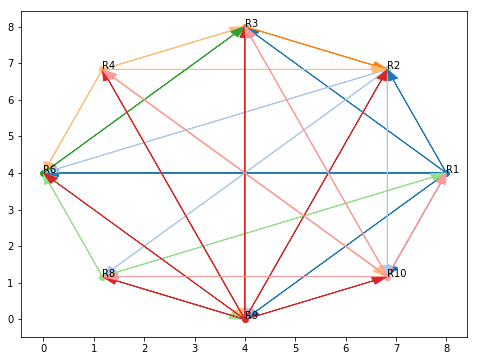

In [15]:
#Initialize:

rec_size = 10
don_size = 50
maxChain = 3
bestFit = 10

[rec_pop, don_pop, don_link, LKDPI, mMat, fitMat, mArr_idx, dMat, temp_hla_b, temp_hla_dr, temp_hla_rel] = preprocessing(rec_size, don_size)

maxOp = rec_pop.shape[1]

print(mMat)

/home/kjartan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:86: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
/home/kjartan/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:390: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/kjartan/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


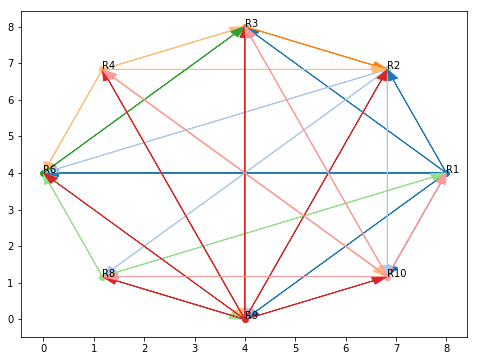

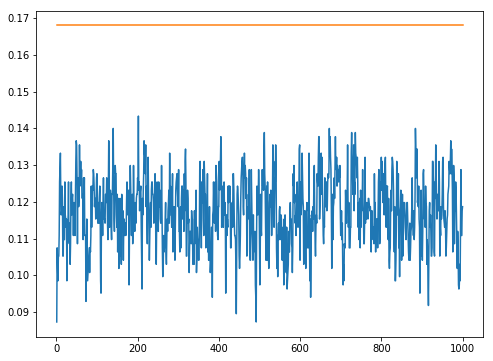

Pair: 1
Kidney Donor: Bloodtype: O, History of Smoking: 0.0, Age: 37,
Kidney Donor: eGFR: 65.4179720901929, BMI: 27.0, African Heritage: 0,
Kidney Donor: SBP: 122.0, Unrelated: 1.0, HLA-B Mismatches: 2.0,
Kidney Donor: HLA-DR Mismatches: 1.0, Gender: 0
Kidney Recipient: Bloodtype: O, History of Smoking: 0.0, Age: 21,
Kidney Recipient: eGFR: 100.9618856992565, BMI: 21.0, African Heritage: 0,
Kidney Recipient: SBP: 122.0, Gender: 0
 
Pair: 2
Kidney Donor: Bloodtype: O, History of Smoking: 0.0, Age: 37,
Kidney Donor: eGFR: 65.4179720901929, BMI: 27.0, African Heritage: 0,
Kidney Donor: SBP: 122.0, Unrelated: 1.0, HLA-B Mismatches: 2.0,
Kidney Donor: HLA-DR Mismatches: 1.0, Gender: 0
Kidney Recipient: Bloodtype: O, History of Smoking: 0.0, Age: 21,
Kidney Recipient: eGFR: 100.9618856992565, BMI: 21.0, African Heritage: 0,
Kidney Recipient: SBP: 122.0, Gender: 0
 
Pair: 3
Kidney Donor: Bloodtype: O, History of Smoking: 0.0, Age: 37,
Kidney Donor: eGFR: 65.4179720901929, BMI: 27.0, African H

In [21]:
rPr = 0.4
gen = 1000
avg = np.zeros(gen)
lead = np.zeros(gen)
champion = np.zeros(rec_pop.shape[1])
best_chain = np.zeros(rec_pop.shape[1])

#maxChain = rec_pop.shape[1]

iPop = int_starting_population(maxOp,50,rec_pop.shape[1])    #Generate Initial GenePool.

#-------------------------------------------------------------------------------------------------------------------------    
#Optimize:

for i in range(gen):
    
#Fitness:

        #[sPop, P_i, avgFit, leader, leadGene] = fitnessOne(iPop, mMat)
        [sPop, P_i, avgFit, leader, leadGene, bestFit, best_chain, genMax] = fitnessThree(iPop, mMat, maxChain, fitMat, bestFit, best_chain)
        
        if i > 0:
            
            champ = np.amax(lead)
            
            if champ < leader:
            
                champion = leadGene
                
                print(f"New Champion: {champion}")
                
        avg[i] = avgFit
        lead[i] = leader
        
        if genMax == 1:
            print(f"Generation: {i}")

#Reproduction:

        rPop = reproduction(sPop, P_i, rPr)

#Permutation:

        kids = sPop.shape[0]-rPop.shape[0]
    
        nPop = permutations(rPop, kids, 0)
        
        iPop = nPop

kidney_chain_plot(mMat, mArr_idx, best_chain)

x = range(1,i+2)

plt.figure(num=3, figsize=[8,6])
plt.plot(x,avg)
plt.plot(x,lead)
plt.show()

test1_pop = np.zeros(shape=(11,4),dtype=object)
test2_pop = np.zeros(shape=(11,4),dtype=object)

for j in range(best_chain.shape[0]-1):
    bc0 = np.int_(best_chain[0])
    bc1 = np.int_(best_chain[j])
    bc2 = np.int_(best_chain[j+1])
    p = np.int_(dMat[bc1,bc2]-1)
    
    print(f"Pair: {j+1}")
    print(f"Kidney Donor: Bloodtype: {don_pop[0,p]},", f"History of Smoking: {don_pop[1,p]},", f"Age: {don_pop[2,p]},")
    print(f"Kidney Donor: eGFR: {don_pop[3,p]},", f"BMI: {don_pop[4,p]},", f"African Heritage: {don_pop[5,p]},")
    print(f"Kidney Donor: SBP: {don_pop[6,p]},", f"Unrelated: {temp_hla_rel[bc2,p]},", f"HLA-B Mismatches: {temp_hla_b[bc2,p]},")
    print(f"Kidney Donor: HLA-DR Mismatches: {temp_hla_dr[bc2,p]},", f"Gender: {don_pop[10,p]}")
    print(f"Kidney Recipient: Bloodtype: {rec_pop[0,bc2]},", f"History of Smoking: {rec_pop[1,bc2]},", f"Age: {rec_pop[2,bc2]},")
    print(f"Kidney Recipient: eGFR: {rec_pop[3,bc2]},", f"BMI: {rec_pop[4,bc2]},", f"African Heritage: {rec_pop[5,bc2]},")
    print(f"Kidney Recipient: SBP: {rec_pop[6,bc2]},", f"Gender: {rec_pop[10,bc2]}")
    print(" ")

bc2 = np.int_(best_chain[j+1])
p = np.int_(dMat[bc2,bc0]-1)

print(f"Pair: {j+2}")
print(f"Kidney Donor: Bloodtype: {don_pop[0,p]},", f"History of Smoking: {don_pop[1,p]},", f"Age: {don_pop[2,p]},")
print(f"Kidney Donor: eGFR: {don_pop[3,p]},", f"BMI: {don_pop[4,p]},", f"African Heritage: {don_pop[5,p]},")
print(f"Kidney Donor: SBP: {don_pop[6,p]},", f"Unrelated: {temp_hla_rel[bc0,p]},", f"HLA-B Mismatches: {temp_hla_b[bc0,p]},")
print(f"Kidney Donor: HLA-DR Mismatches: {temp_hla_dr[bc0,p]},", f"Gender: {don_pop[10,p]}")
print(f"Kidney Recipient: Bloodtype: {rec_pop[0,bc0]},", f"History of Smoking: {rec_pop[1,bc0]},", f"Age: {rec_pop[2,bc0]},")
print(f"Kidney Recipient: eGFR: {rec_pop[3,bc0]},", f"BMI: {rec_pop[4,bc0]},", f"African Heritage: {rec_pop[5,bc0]},")
print(f"Kidney Recipient: SBP: {rec_pop[6,bc0]},", f"Gender: {rec_pop[10,bc0]}")